# <font color='green'>Validacion cruzada</font>
## <font color='blue'>Rachit Vargas</font>

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [239]:
iris = pd.read_csv('/content/iris.csv', sep=';')
iris.head()

,s.largo,s.ancho,p.largo,p.ancho,tipo
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [240]:
X = iris.iloc[:,:-1]
y = iris.iloc[:,-1]

In [241]:
error = []

for i in range(15):
  x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
  knn = KNeighborsClassifier(n_neighbors=5)
  knn.fit(x_train, y_train)
  
  error.append(1 - knn.score(x_test, y_test))

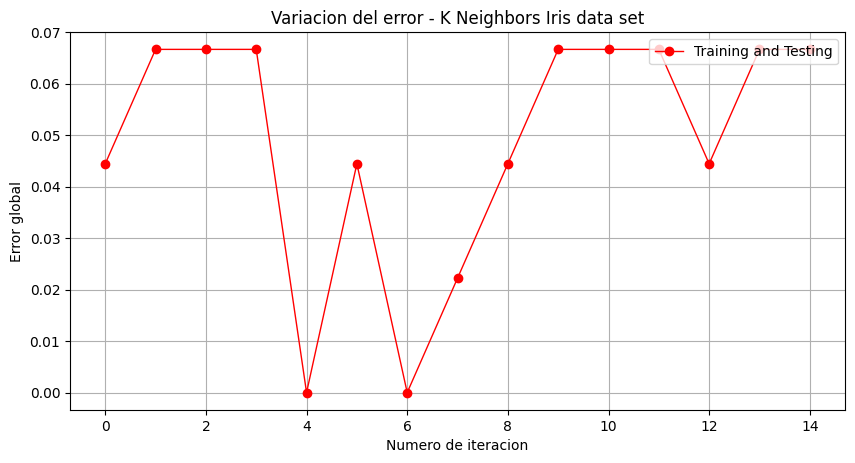

In [242]:
plt.figure(figsize=(10,5), dpi=100)
plt.plot(error, '-o', lw=1, color='red')
plt.gca().update(dict(title='Variacion del error - K Neighbors Iris data set', 
                      xlabel='Numero de iteracion', ylabel='Error global'))
plt.grid(True)
plt.legend(['Training and Testing'], loc='upper right', fontsize=10)

In [243]:
error_b = []

for i in range(15):
  knn = KNeighborsClassifier(n_neighbors=8)
  knn.fit(X, y)

  error_b.append(1 - knn.score(X, y))

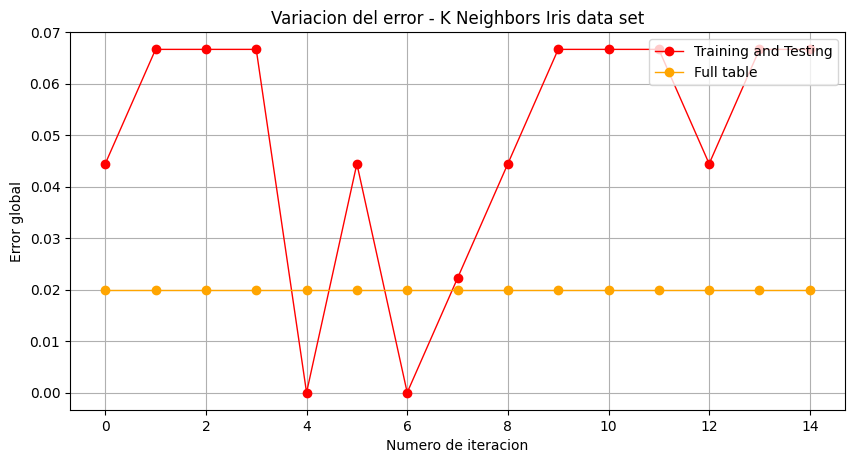

In [244]:
plt.figure(figsize=(10,5), dpi=100)
plt.plot(error, '-o', lw=1, color='red')
plt.plot(error_b, '-o', lw=1, color='orange')
plt.gca().update(dict(title='Variacion del error - K Neighbors Iris data set', 
                      xlabel='Numero de iteracion', ylabel='Error global'))
plt.grid(True)
plt.legend(['Training and Testing', 'Full table'], loc = 'upper right', fontsize = 10)

In [245]:
error_loo = []

for i in range(15):
  kfold = KFold(n_splits=150, shuffle=True)
  error_fold = []

  for train, test in kfold.split(X, y):
    knn = KNeighborsClassifier(n_neighbors=8)
    knn.fit(X.iloc[train], y.iloc[train])
    error_fold.append(1 - knn.score(X.iloc[test], y.iloc[test]))
  
  error_loo.append(np.mean(error_fold))

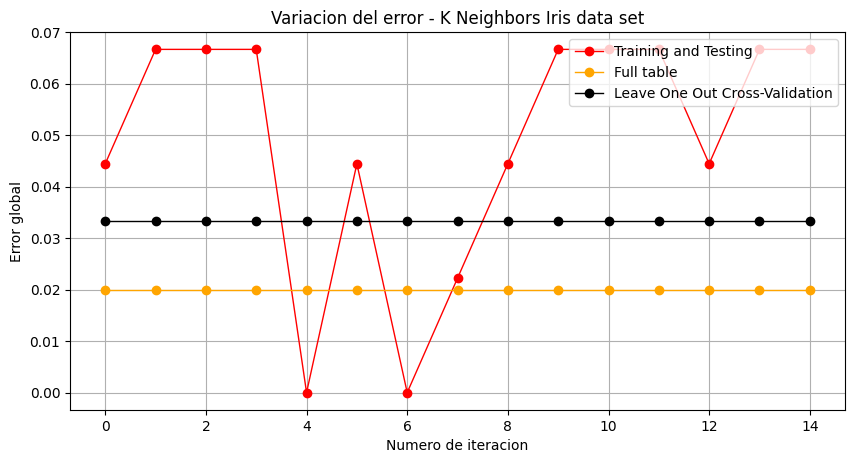

In [249]:
plt.figure(figsize=(10,5), dpi=100)
plt.plot(error, '-o', lw=1, color='red')
plt.plot(error_b, '-o', lw=1, color='orange')
plt.plot(error_loo, '-o', lw=1, color='black')
plt.gca().update(dict(title='Variacion del error - K Neighbors Iris data set', 
                      xlabel='Numero de iteracion', ylabel='Error global'))
plt.grid(True)
plt.legend(['Training and Testing', 'Full table', 'Leave One Out Cross-Validation'], 
           loc = 'upper right', fontsize = 10)

In [247]:
error_vc = []

for i in range(15):
  kfold = KFold(n_splits=20, shuffle=True)
  error_fold = []

  for train, test in kfold.split(X, y):
    knn = KNeighborsClassifier(n_neighbors=8)
    knn.fit(X.iloc[train], y.iloc[train])
    error_fold.append(1 - knn.score(X.iloc[test], y.iloc[test]))
  
  error_vc.append(np.mean(error_fold))

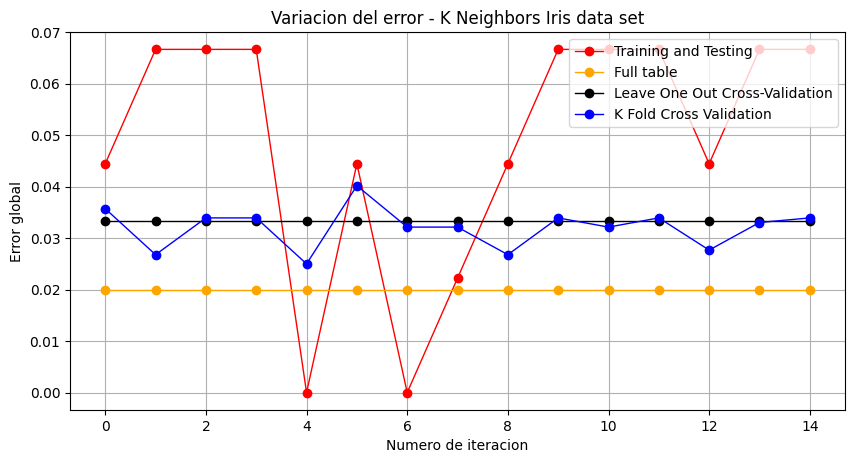

In [250]:
plt.figure(figsize=(10,5), dpi=100)
plt.plot(error, '-o', lw=1, color='red')
plt.plot(error_b, '-o', lw=1, color='orange')
plt.plot(error_loo, '-o', lw=1, color='black')
plt.plot(error_vc, '-o', lw=1, color='blue')
plt.gca().update(dict(title='Variacion del error - K Neighbors Iris data set', 
                      xlabel='Numero de iteracion', ylabel='Error global'))
plt.grid(True)
plt.legend(['Training and Testing', 'Full table', 'Leave One Out Cross-Validation', 'K Fold Cross Validation'], 
           loc = 'upper right', fontsize = 10)